In [1]:
import torch
from geopy.distance import geodesic as GD

from config import cfg

from geo_clip import GeoCLIP, img_val_transform
import PIL.Image as Image

import matplotlib.pyplot as plt

c:\Users\Aninda\miniconda3\envs\geo-clip\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image1_file_path = 'D:/Kerner-Lab/geo-clip-paper-implementation/test_image/asu_library.jpg'
image2_file_path = 'D:/Kerner-Lab/geo-clip-paper-implementation/test_image/Eiffel_Tower.jpeg'
image3_file_path = 'D:/Kerner-Lab/geo-clip-paper-implementation/test_image/taj_mahal.jpg'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model = GeoCLIP(cfg)
state_dict = torch.load(cfg.MODEL.CHECKPOINT_PATH, map_location='cpu')
model.load_state_dict(state_dict['state_dict'])
model.to(device)
model.eval()

GeoCLIP(
  (image_encoder): ImageEncoder(
    (CLIP): CLIPModel(
      (text_model): CLIPTextTransformer(
        (embeddings): CLIPTextEmbeddings(
          (token_embedding): Embedding(49408, 768)
          (position_embedding): Embedding(77, 768)
        )
        (encoder): CLIPEncoder(
          (layers): ModuleList(
            (0-11): 12 x CLIPEncoderLayer(
              (self_attn): CLIPAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
                (q_proj): Linear(in_features=768, out_features=768, bias=True)
                (out_proj): Linear(in_features=768, out_features=768, bias=True)
              )
              (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): CLIPMLP(
                (activation_fn): QuickGELUActivation()
                (fc1): Linear(in_features=768, out_features=3072, bias=True)
            

In [5]:
def predict(model, image):
    # image = torch.tensor(image, dtype=torch.float32)
    image = model.image_encoder.preprocess_image(image)
    image = image.to(device)

    gps_gallery = model.gps_gallery.to(device)

    logits_per_image = model.forward(image, gps_gallery)
    probs_per_image = logits_per_image.softmax(dim=-1).cpu()

    # Get top k predictions
    top_pred = torch.topk(probs_per_image, 3, dim=1)
    top_pred_gps = gps_gallery[top_pred.indices[0]]
    top_pred_prob = top_pred.values[0]

    return top_pred_gps, top_pred_prob

Image 1 GPS: tensor([[  33.4187, -111.9389],
        [  33.4187, -111.9369],
        [  33.4192, -111.9505]], device='cuda:0')
Image 1 Probability: tensor([0.0082, 0.0080, 0.0079], grad_fn=<SelectBackward0>)


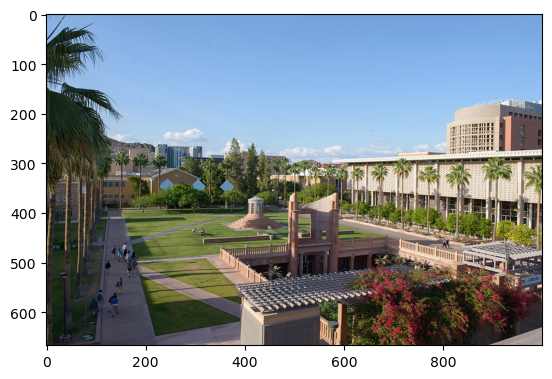

In [6]:
#read image
image = Image.open(image1_file_path).convert('RGB')

#plot image
plt.imshow(image)

image1_gps, image1_prob = predict(model, image)

print(f"Image 1 GPS: {image1_gps}")
print(f"Image 1 Probability: {image1_prob}")

Image 2 GPS: tensor([[48.8616,  2.2941],
        [48.8629,  2.2959],
        [48.8619,  2.2903]], device='cuda:0')
Image 2 Probability: tensor([0.0013, 0.0013, 0.0013], grad_fn=<SelectBackward0>)


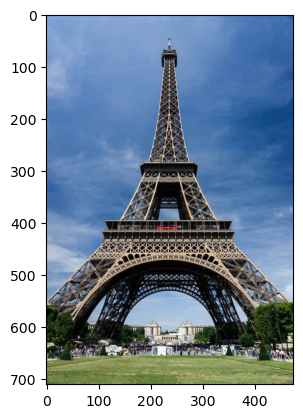

In [7]:
#read image
image = Image.open(image2_file_path).convert('RGB')

#plot image
plt.imshow(image)

image2_gps, image2_prob = predict(model, image)

print(f"Image 2 GPS: {image2_gps}")
print(f"Image 2 Probability: {image2_prob}")

Image 3 GPS: tensor([[27.1676, 78.0369],
        [27.1692, 78.0422],
        [27.1711, 78.0407]], device='cuda:0')
Image 3 Probability: tensor([0.0143, 0.0136, 0.0135], grad_fn=<SelectBackward0>)


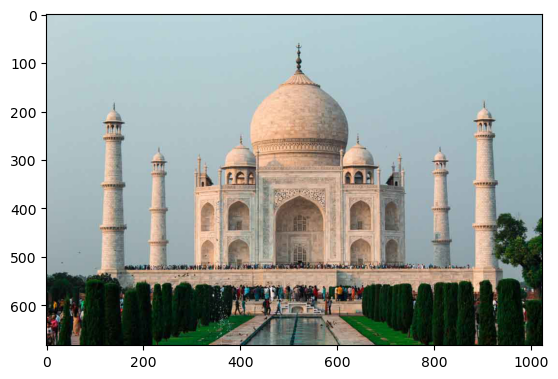

In [8]:
#read image
image = Image.open(image3_file_path).convert('RGB')

#plot image
plt.imshow(image)

image3_gps, image3_prob = predict(model, image)

print(f"Image 3 GPS: {image3_gps}")
print(f"Image 3 Probability: {image3_prob}")